In [1]:
import numpy as np
import os
import sys
import time
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage import exposure
from sklearn.model_selection import train_test_split

%matplotlib inline

/anaconda/envs/py35/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


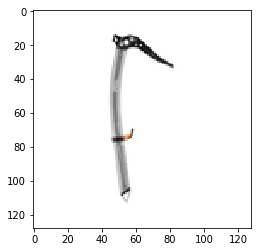

In [3]:
def pad_image(x): #image
    x.shape
    idealSize = 2**( math.floor(np.log2(max(x.shape[0], x.shape[1])))+1 )

    pad = x.shape[0] - x.shape[1]

    padX = idealSize - x.shape[0]
    padY = idealSize - x.shape[1]

    padx_before = padX//2
    padx_after=  idealSize - padx_before - x.shape[0]

    pady_before = padY//2
    pady_after = idealSize - pady_before - x.shape[1]

    newArr = np.pad(x, ((padx_before,padx_after),(pady_before,pady_after),(0,0)),mode='constant', constant_values=255)

    img = Image.fromarray(newArr, 'RGB')
    img2 = img.resize((128,128), Image.ANTIALIAS)
    plt.imshow(img2)
    return img2

def contrast_stretching(img): #img as image
    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(np.asarray(img), clip_limit=0.03)
    return img_adapteq

def preprocess_img(img):
    img1 = pad_image(img)
    img2 = contrast_stretching(img1)
    return img2


features = []
labels = []

for path, subdirs, files in os.walk('gear_images/'):
    for name in files:
        label = path.split('/')[1]
        full_path = os.path.join(path, name)
        img = plt.imread(full_path)
        preprocessed_image = preprocess_img(img).flatten()
        
        features.append(preprocessed_image)
        labels.append(label)

In [4]:
# ADD CODE: Install the Custom Vision SDK
!pip install azure-cognitiveservices-vision-customvision

/bin/sh: pip: command not found


In [ ]:
# ADD CODE: Assign your service keys to variables
training_key = ''
prediction_key = ''

In [ ]:
print ("Adding training images...")

hardshell_dir = "gear_images/hardshell_jackets"

for image in os.listdir(os.fsencode("gear_images/hardshell_jackets")):
    with open(hardshell_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data, [ hardshell_jacket_tag.id ])

        
insulated_dir = "gear_images/insulated_jackets"

for image in os.listdir(os.fsencode("gear_images/insulated_jackets")):
    with open(insulated_dir + "/" + os.fsdecode(image), mode="rb") as img_data: 
        trainer.create_images_from_data(project.id, img_data, [ insulated_jacket_tag.id ])

print ("Finished adding training images.")   

In [ ]:
# ADD CODE: Train the images

print ("Training...")
iteration = trainer.train_project(project.id)
while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project.id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)

# The iteration is now trained. Make it the default project endpoint
trainer.update_iteration(project.id, iteration.id, is_default=True)
print ("Done!")

In [ ]:
# ADD CODE: Import the prediction endpoint
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models

# ADD CODE: Create an instance of the prediction endpoint using your prediction key
predictor = prediction_endpoint.PredictionEndpoint(prediction_key)